In [7]:
# !head QCEWResults.csv

## Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
# visualization parameters
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['grid.color'] = 'white'
plt.rcParams['lines.color'] = 'white'

import_df = pd.read_excel(r'Supermarket.xlsx')
import_df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England
4,AZ-2011-617423,2011-01-05,Daniel Burke,Echirolles,France,Central,Home Office,2011-01-07,Priority,Auvergne-Rhône-Alpes


## Logistic Metrics

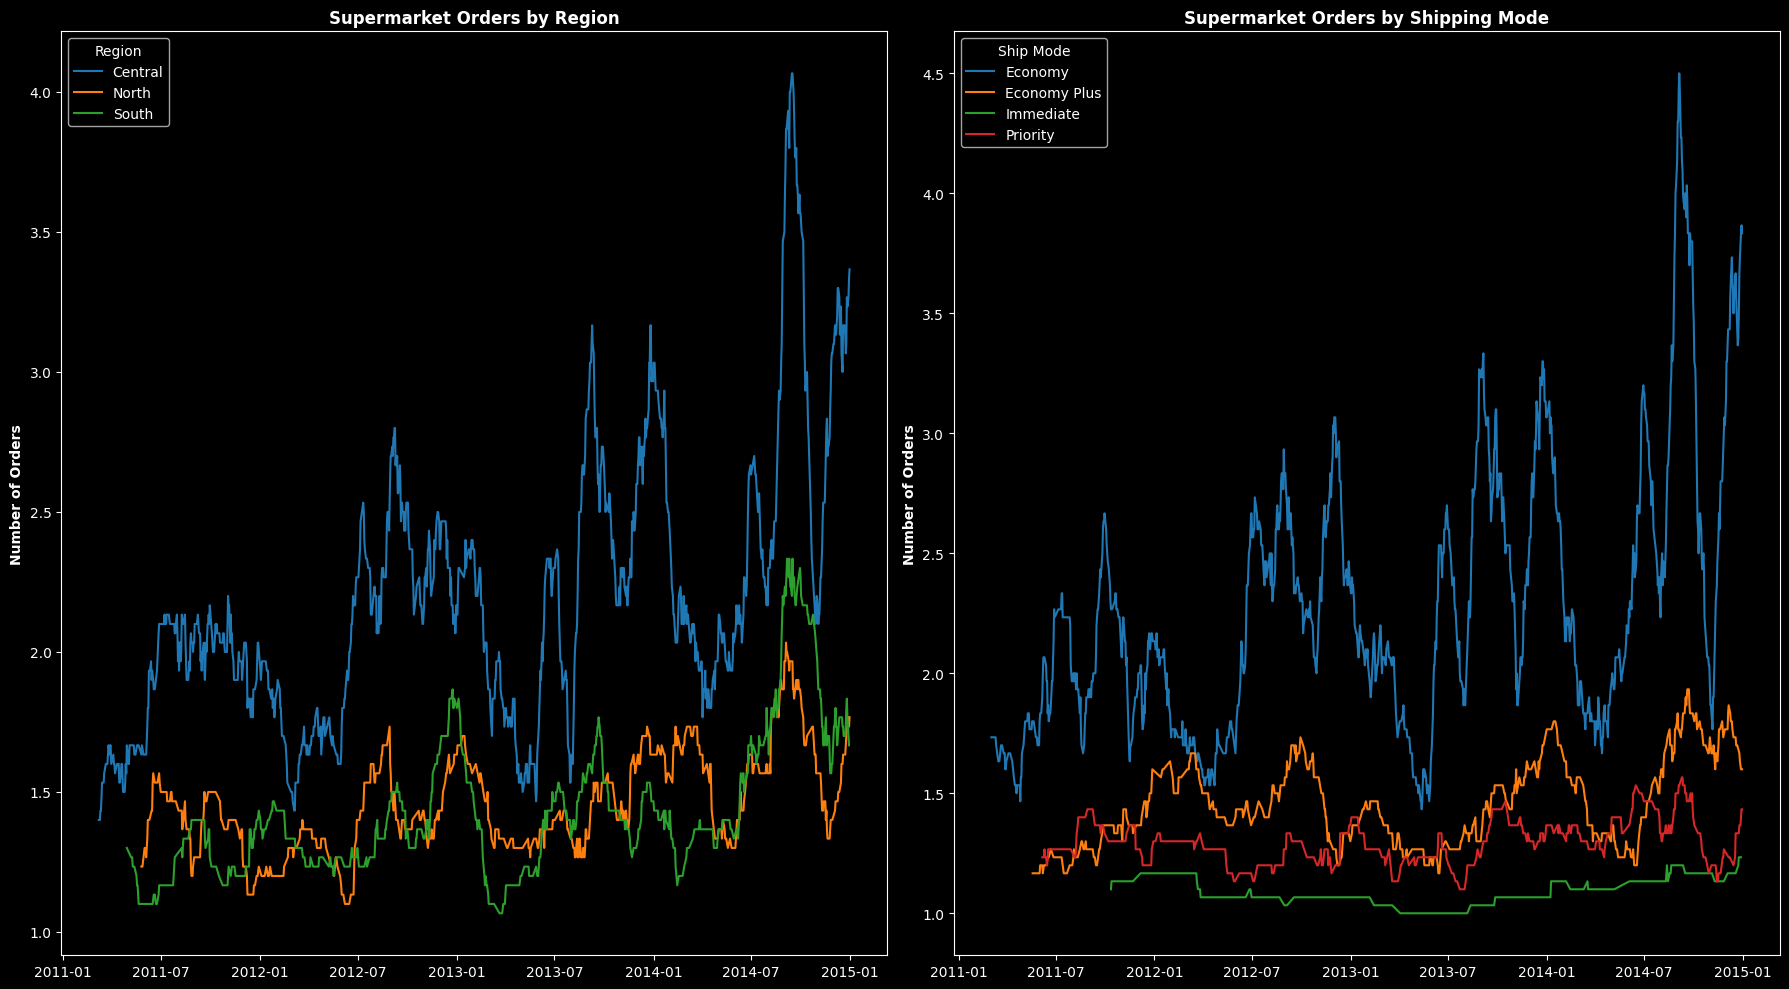

In [242]:
# convert to datetime
import_df['Order Date'] = pd.to_datetime(import_df['Order Date'])

# number of orders by date for each region
date_counts = import_df.groupby(['Order Date', 'Region'])['Order Date'].count().reset_index(name='count').sort_values('Order Date')

# rolling averages for nicer plot
rolling_averages = date_counts.set_index('Order Date').groupby('Region')['count'].rolling(window=30).mean().reset_index()

# create plot
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

sns.lineplot(data=rolling_averages, x='Order Date', y='count', hue='Region', ax=ax[0])

ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Orders',fontweight='bold')
ax[0].set_title('Supermarket Orders by Region',fontweight='bold')
ax[0].tick_params(axis='x', rotation=0)
ax[0].grid(False)

# convert to datetime

# number of orders by date for each region
date_counts_ship = import_df.groupby(['Order Date', 'Ship Mode'])['Order Date'].count().reset_index(name='count').sort_values('Order Date')

# rolling averages for nicer plot
rolling_averages_ship = date_counts_ship.set_index('Order Date').groupby('Ship Mode')['count'].rolling(window=30).mean().reset_index()

# add to plot
sns.lineplot(data=rolling_averages_ship, x='Order Date', y='count', hue='Ship Mode', ax=ax[1])

ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Orders',fontweight='bold')
ax[1].set_title('Supermarket Orders by Shipping Mode',fontweight='bold')
ax[1].tick_params(axis='x', rotation=0)
ax[1].grid(False)

plt.tight_layout()
plt.savefig('orders_over_time.png')
plt.show()

## Geographic Metrics

#### Orders by Country

In [119]:
import pandas as pd
import geopandas
import folium

boundary_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

# common geospatial boundary dataset
world = geopandas.read_file(boundary_path)



value_counts_df = import_df['Country'].value_counts().reset_index()
value_counts_df.columns = ['SOVEREIGNT', 'Order_Count'] # SOVERIGNT matches the country names in dataframe

# create map plot
choro = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=value_counts_df,
    columns=['SOVEREIGNT', 'Order_Count'],
    key_on='feature.properties.SOVEREIGNT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Orders by Country'
).add_to(choro)

choro.save('choropleth.html')
choro

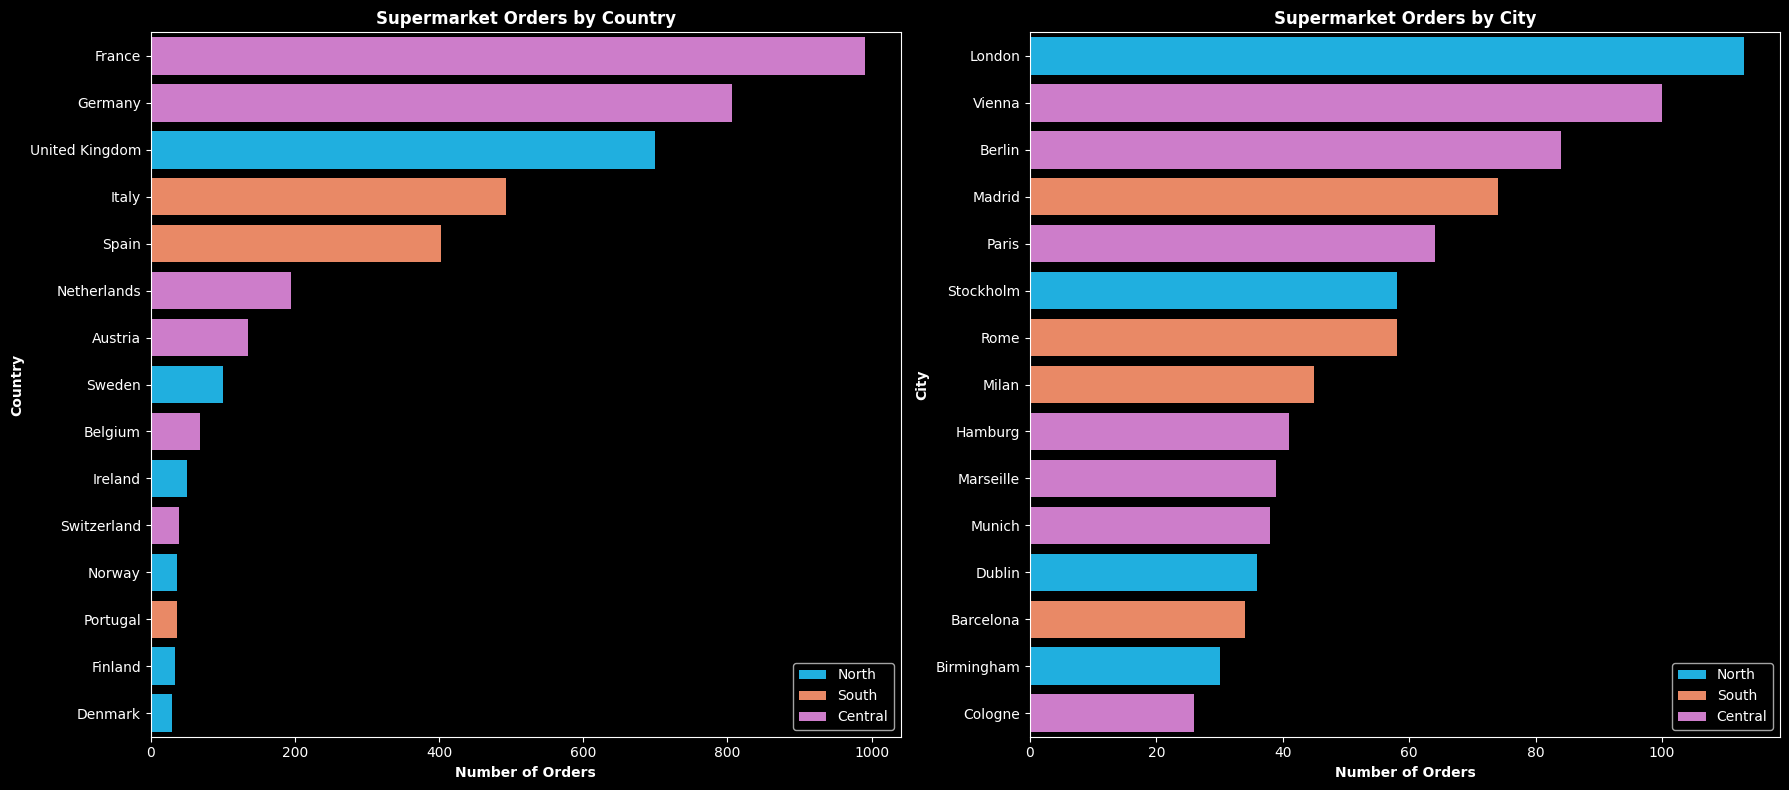

In [241]:
# by country:

# number of orders for each country
country_counts = import_df.groupby(['Country', 'Region'])['Country'].count().reset_index(name='count')

# sort by total counts
country_counts = country_counts.sort_values(by='count', ascending=False)

# consistent colormap for both plots
region_palette = {'North': 'deepskyblue', 'South': 'coral', 'Central': 'orchid'}
region_order = ['North', 'South', 'Central']

# create plot
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=country_counts, y='Country', x='count', hue='Region', palette=region_palette, hue_order=region_order, dodge=False, ax=ax[0]) # categorical matplotlib colormap
ax[0].set_title('Supermarket Orders by Country',fontweight='bold')
ax[0].set_xlabel('Number of Orders',fontweight='bold')
ax[0].set_ylabel('Country',fontweight='bold')
ax[0].legend(loc='lower right')


# by city:

# number of orders for each city
city_counts = import_df.groupby(['City', 'Region'])['City'].count().reset_index(name='count')

# sort by total counts
top_city_counts = city_counts.sort_values(by='count', ascending=False).head(15)

sns.barplot(data=top_city_counts, y='City', x='count', hue='Region', palette=region_palette, hue_order=region_order, dodge=False, ax=ax[1]) # categorical matplotlib colormap
ax[1].set_title('Supermarket Orders by City',fontweight='bold')
ax[1].set_xlabel('Number of Orders',fontweight='bold')
ax[1].set_ylabel('City',fontweight='bold')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig('orders_city_country.png')
plt.show()


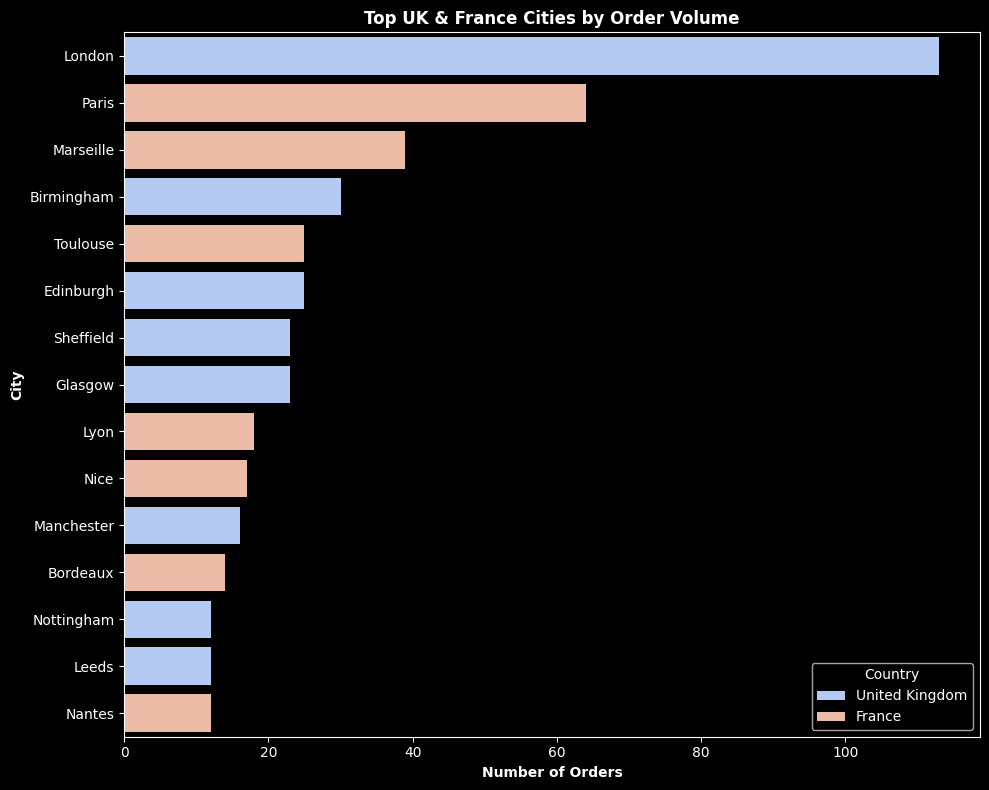

In [243]:
# create dataframe of UK and france orders
uk_france_df = import_df[import_df['Country'].isin(['United Kingdom', 'France'])]

# number of orders by city
city_counts_uk_france = uk_france_df.groupby(['City', 'Country'])['City'].count().reset_index(name='count')

# top cities
top_cities_uk_france = city_counts_uk_france.sort_values(by='count', ascending=False).head(15)

# create plot
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=top_cities_uk_france, y='City', x='count', hue='Country', palette='coolwarm', ax=ax)

ax.set_title('Top UK & France Cities by Order Volume', fontweight='bold')
ax.set_xlabel('Number of Orders', fontweight='bold')
ax.set_ylabel('City', fontweight='bold')
ax.legend(title='Country', loc='lower right')
ax.grid(False)

plt.tight_layout()
plt.savefig('UK_france_cities.png')
plt.show()

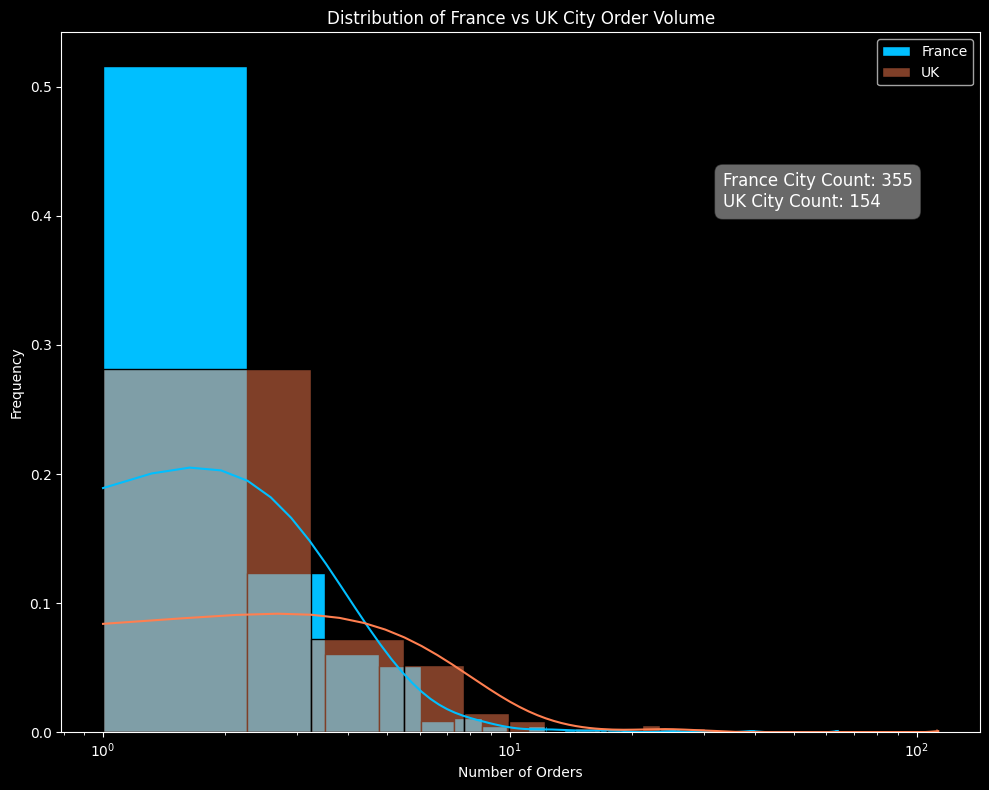

In [248]:

# data for france and uk cities
france_cities = import_df[import_df['Country'] == 'France']['City'].value_counts()
uk_cities = import_df[import_df['Country'] == 'United Kingdom']['City'].value_counts()

total_france_cities = len(france_cities)
total_uk_cities = len(uk_cities)
annotation = f'France City Count: {total_france_cities}\nUK City Count: {total_uk_cities}'

# create plit
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(data=france_cities, common_norm=True, color='deepskyblue', bins=50, kde=True, stat='density', alpha=1, label='France', ax=ax)
sns.histplot(data=uk_cities, common_norm=True, color='coral', bins=50, kde=True, stat='density', alpha=0.5, label='UK', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of France vs UK City Order Volume')
ax.legend()
ax.annotate(annotation,(0.72,0.75),color='white',xycoords='axes fraction', fontsize=12,bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.savefig('UK_france_distribution.png')
plt.show()


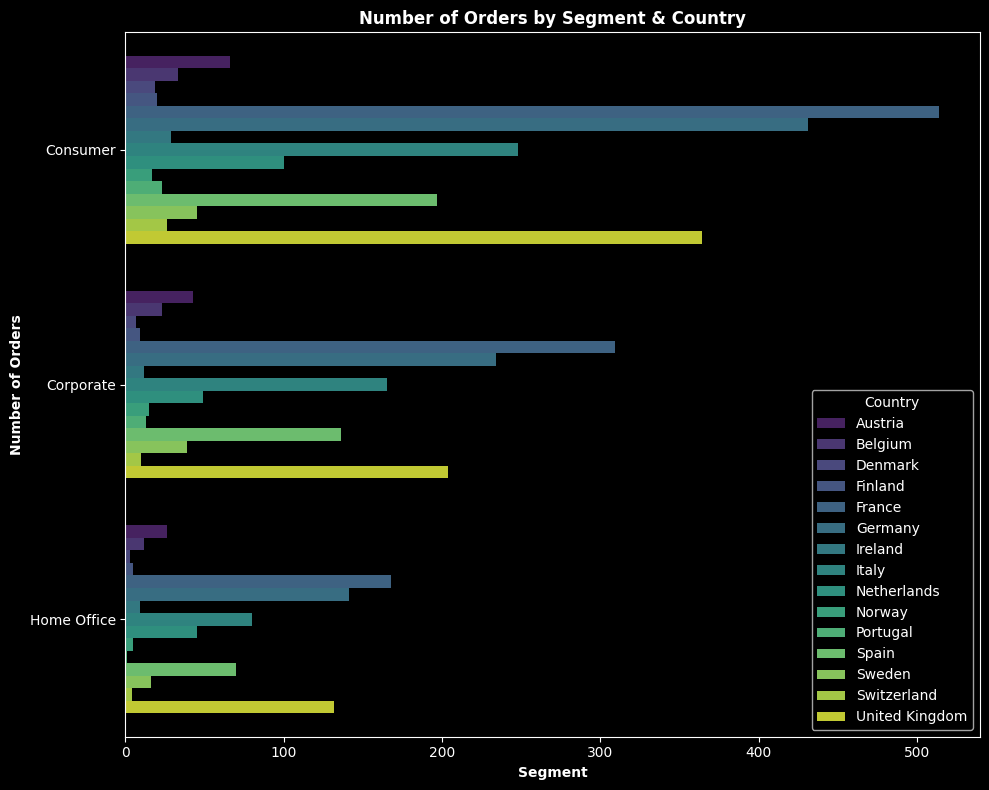

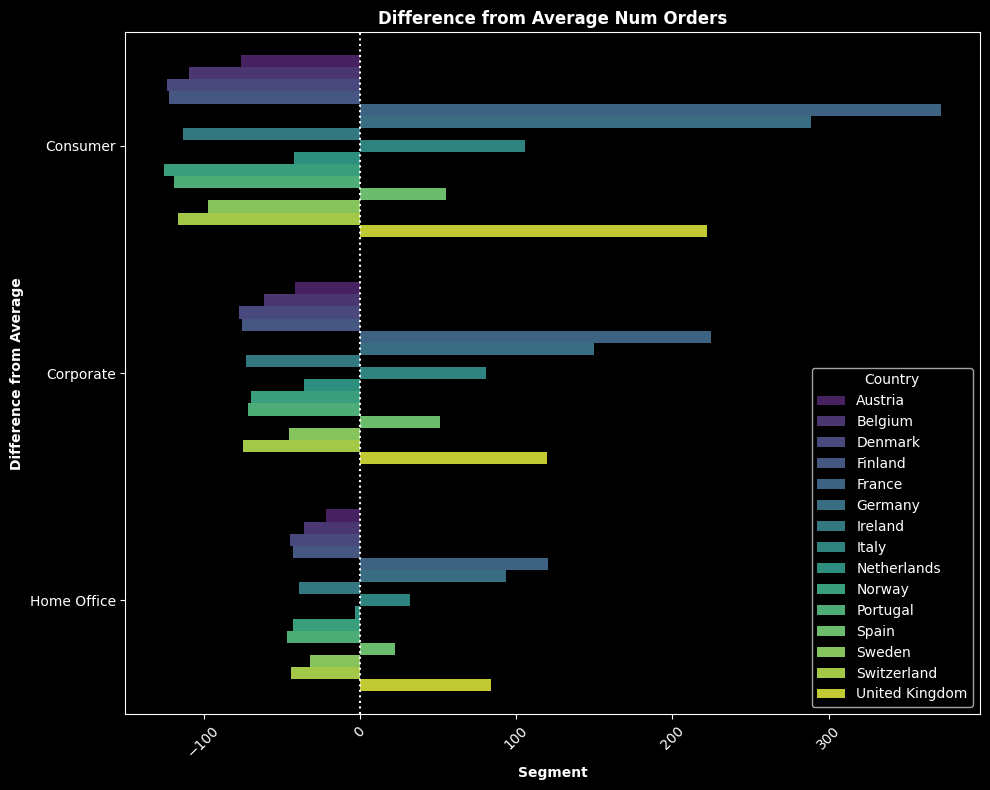

In [251]:
# orders by country / segment

fig, ax = plt.subplots(1,1,figsize=(10,8))
segment_grouped = import_df.groupby(['Country','Segment']).size().reset_index(name='count')
sns.barplot(data=segment_grouped,y='Segment',x='count',hue='Country',palette='viridis')
ax.set_xlabel('Segment', fontweight='bold')
ax.set_ylabel('Number of Orders', fontweight='bold')
ax.set_title('Number of Orders by Segment & Country', fontweight='bold')

plt.tight_layout()
plt.savefig('segments.png')
plt.show()


# plotting difference from mean number of orders for each country:

# order counts for each segment
segment_grouped = import_df.groupby(['Country', 'Segment']).size().reset_index(name='count')

# mean order count for each segment
segment_means = segment_grouped.groupby('Segment')['count'].mean().reset_index(name='mean_count')

# merge both together
segment_with_means = pd.merge(segment_grouped, segment_means, on='Segment')

# difference from mean
segment_with_means['diff_from_mean'] = segment_with_means['count'] - segment_with_means['mean_count']

# create plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.barplot(data=segment_with_means,y='Segment',x='diff_from_mean',hue='Country',palette='viridis',ax=ax)

# line at mean
ax.axvline(0, color='white', linestyle=':')

ax.set_xlabel('Segment', fontweight='bold')
ax.set_ylabel('Difference from Average', fontweight='bold')
ax.set_title('Difference from Average Num Orders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Country')

plt.tight_layout()
plt.savefig('segments_mean.png')
plt.show()